In [1]:
%cat 0Source_Citation.txt

Source and citation

- This notebook is a part of the `pytheos` package.
- Website: http://github.com/SHDShim/pytheos.
- How to cite: S.-H. Shim (2017) Pytheos - a python tool set for equations of state. DOI: 10.5281/zenodo.802392


In [2]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [3]:
%config InlineBackend.figure_format = 'retina'

# 0. General note

This notebook shows how to calculate thermal pressure and associated terms in the constant q approach.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uct
from uncertainties import unumpy as unp
import pandas as pd
import pytheos as eos

# 1. Calculate Debye energy with uncertainties

Assign uncertainties to `x`. Note that:

$$ x = \dfrac{\theta}{T} $$

where $\theta$ is the Debye temperature.

In [8]:
x = unp.uarray(np.linspace(0.01,15.,20), np.ones(20)*0.5) # 0.1,7.25

In [9]:
energy = eos.debye_E(x)

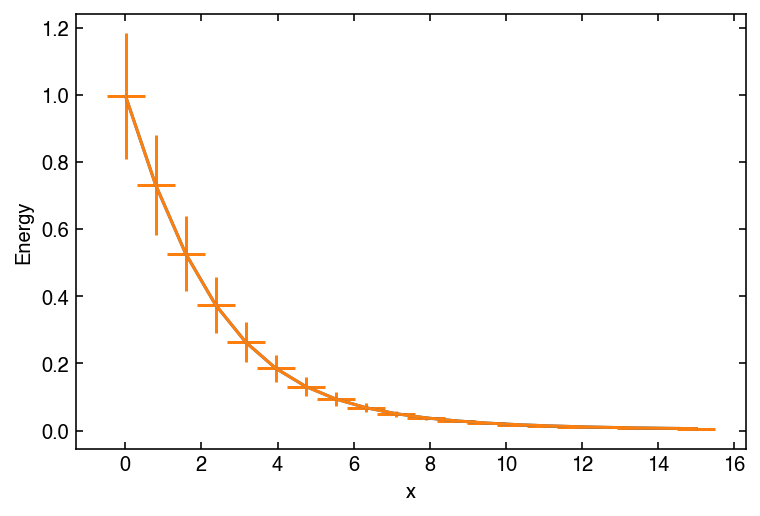

In [10]:
plt.plot(unp.nominal_values(x), unp.nominal_values(energy))
plt.xlabel('x'); plt.ylabel('Energy')
plt.errorbar(unp.nominal_values(x), unp.nominal_values(energy), 
             xerr = unp.std_devs(x), yerr = unp.std_devs(energy));

# 2. Calculate Gruneisen parameter

You may get some help on how to call the function using `help()` command.  `constq_grun` calculates Gruneisen $(\gamma)$ parameter with error propagation based on the following relation:

$$\dfrac{\gamma}{\gamma_0} = \left( \dfrac{V}{V_0} \right)^q$$

where $\gamma_0$ is the Gruneisen parameter at reference conditions and $V$ is the volume.  $q$ is the logarithmic volume dependence of Gruneisen parameter.

In [11]:
help(eos.constq_grun)

Help on function constq_grun in module pytheos.eqn_therm_constq:

constq_grun(v, v0, gamma0, q)
    calculate Gruneisen parameter for constant q
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Grunseinen parameter
    :return: Gruneisen parameter at a given volume



Calculate Gruneisen parameter without error bar.

In [12]:
v0 = 162.3
v = np.linspace(v0, v0*0.8, 20)
grun = eos.constq_grun(v, v0, 1.5, 2)

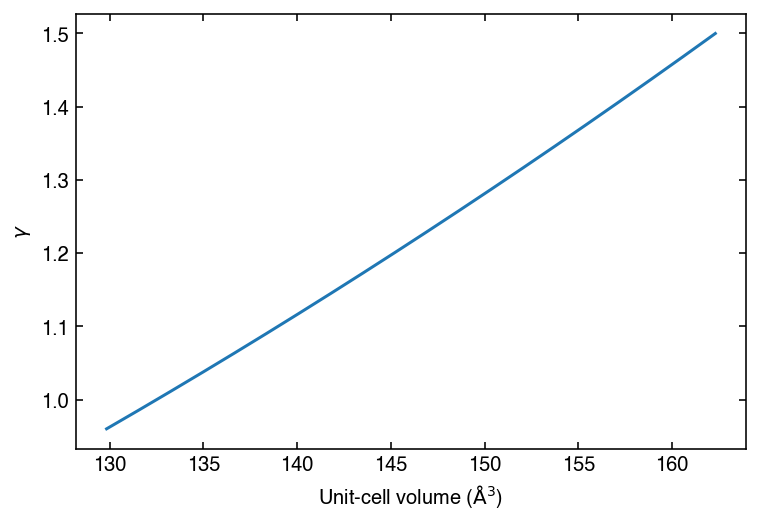

In [13]:
plt.plot(v, grun)
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');

The cell below shows how to do error propagation.

In [15]:
s_v = np.random.uniform(0., 0.1, 20)
v_u = unp.uarray(v, s_v)
gamma = eos.constq_grun(v_u, uct.ufloat(v0, 0.01), 
                        uct.ufloat(1.5, 0.1), uct.ufloat(2.,0.5))
gamma

array([1.5+/-0.10000673401492648,
       1.4685872576177283+/-0.09821442329048266,
       1.4375069252077564+/-0.09704779845875745,
       1.406759002770083+/-0.0964743887312415,
       1.3763434903047091+/-0.09641367235498557,
       1.3462603878116342+/-0.09685986857260223,
       1.3165096952908588+/-0.09771196934513827,
       1.287091412742382+/-0.09895031823287559,
       1.2580055401662051+/-0.10048401327003634,
       1.2292520775623266+/-0.10227124734203469,
       1.200831024930748+/-0.10425314139260053,
       1.1727423822714682+/-0.10639964786695116,
       1.1449861495844877+/-0.10864230593110166,
       1.1175623268698058+/-0.11096206747510204,
       1.0904709141274238+/-0.11331873167009572,
       1.0637119113573406+/-0.1156851467733663,
       1.0372853185595567+/-0.11803331216107896,
       1.0111911357340722+/-0.12034287666368694,
       0.9854293628808866+/-0.12259582526836013,
       0.9599999999999999+/-0.12477348846107697], dtype=object)

If you need a pretty table.

In [17]:
df = pd.DataFrame()
df['volume'] = v_u
df['gamma'] = gamma
df
# print(df.to_string(index=False))

,volume,gamma
0,162.30+/-0.06,1.50+/-0.10
1,160.592+/-0.018,1.47+/-0.10
2,158.883+/-0.027,1.44+/-0.10
3,157.17+/-0.09,1.41+/-0.10
4,155.4663+/-0.0031,1.38+/-0.10
5,153.76+/-0.08,1.35+/-0.10
6,152.049+/-0.028,1.32+/-0.10
7,150.34+/-0.09,1.29+/-0.10
8,148.63+/-0.08,1.26+/-0.10
9,146.92+/-0.07,1.23+/-0.10


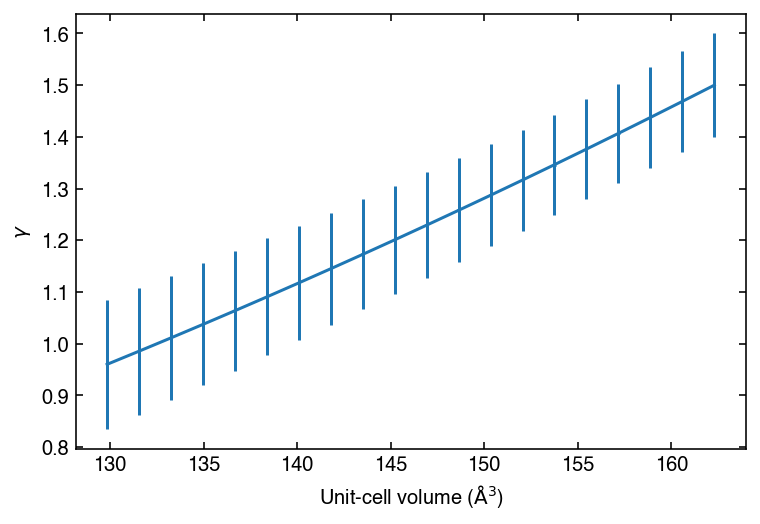

In [19]:
plt.errorbar(unp.nominal_values(v_u), 
             unp.nominal_values(gamma), xerr=unp.std_devs(v_u), 
             yerr=unp.std_devs(gamma))
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');

You do not need to provide uncertainties for all the parameters.  The cell below shows a case where we do not have error bars for the parameters.  In this case, we have uncertainties for volume.

In [20]:
eos.constq_grun(v_u, v0, 1.5, 2.)

array([1.5+/-0.001145723108195389,
       1.4685872576177283+/-0.0003352909626671559,
       1.4375069252077564+/-0.0004954360857273584,
       1.406759002770083+/-0.0015603479886656458,
       1.3763434903047091+/-5.4261559255080005e-05,
       1.3462603878116342+/-0.0014409219018693658,
       1.3165096952908588+/-0.000487689555826435,
       1.287091412742382+/-0.0014828119198171017,
       1.2580055401662051+/-0.0012791921872254597,
       1.2292520775623266+/-0.0011683822616539758,
       1.200831024930748+/-0.00021586919934286005,
       1.1727423822714682+/-0.0011849544383953808,
       1.1449861495844877+/-0.0002636550802974636,
       1.1175623268698058+/-0.0003115848981913069,
       1.0904709141274238+/-0.00019830787522173195,
       1.0637119113573406+/-0.0005820898685579767,
       1.0372853185595567+/-0.0005885620164704891,
       1.0111911357340722+/-0.0005973867217747762,
       0.9854293628808866+/-0.0007098012988683172,
       0.9599999999999999+/-0.000303276727539658

# 3. Calculate Debye temperature and thermal pressure

You can get the Debye temperatures with error bars.

In [21]:
help(eos.constq_debyetemp)

Help on function constq_debyetemp in module pytheos.eqn_therm_constq:

constq_debyetemp(v, v0, gamma0, q, theta0)
    calculate Debye temperature for constant q
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature at 1 bar
    :return: Debye temperature in K



In [22]:
eos.constq_debyetemp(v_u, v0, 1.5, 2., 1000.)

array([1000.0+/-0.5728615540976946,
       1015.8303645504885+/-0.17029937041833063,
       1031.7398349865637+/-0.25558057266736683,
       1047.7243207919184+/-0.8174072683118749,
       1063.7796300436687+/-0.028861170714980806,
       1079.901470649432+/-0.7780268404598524,
       1096.0854516873335+/-0.26727471354060656,
       1112.327084849175+/-0.8246859300748828,
       1128.6217859868752+/-0.7218620854834279,
       1144.964876762185+/-0.6688783261128838,
       1161.351586399536+/-0.1253500185558141,
       1177.777053541791+/-0.6978060735172895,
       1194.2363282085053+/-0.15743323750398078,
       1210.7243738562106+/-0.18862171538286057,
       1227.2360695400907+/-0.12168528867298255,
       1243.7662121763+/-0.36199185548127755,
       1260.309518904035+/-0.37088515591155535,
       1276.860629546358+/-0.3813897928239879,
       1293.414109168624+/-0.45903350733124837,
       1309.9644507332475+/-0.1986408659058325], dtype=object)

You can get thermal pressures with error bars.

In [23]:
help(eos.constq_pth)

Help on function constq_pth in module pytheos.eqn_therm_constq:

constq_pth(v, temp, v0, gamma0, q, theta0, n, z, t_ref=300.0, three_r=24.943379399999998)
    calculate thermal pressure for constant q
    
    :param v: unit-cell volume in A^3
    :param temp: temperature
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature in K
    :param n: number of atoms in a formula unit
    :param z: number of formula unit in a unit cell
    :param t_ref: reference temperature
    :param three_r: 3R in case adjustment is needed
    :return: thermal pressure in GPa



In [24]:
p_th = eos.constq_pth(v_u, unp.uarray(np.ones_like(v)*2000., np.ones_like(v)*100), v0, 1.5, 2., 1000., 5, 4)
p_th

array([12.070619165469735+/-0.7561442486776166,
       11.917512369564442+/-0.747869664004761,
       11.764621139966481+/-0.73961632553831,
       11.611966188562544+/-0.7313986785823212,
       11.459568259995653+/-0.7231031159129029,
       11.307448093764947+/-0.7148873639424222,
       11.155626386256875+/-0.7066023854197163,
       11.004123752837431+/-0.6983896522120643,
       10.852960690132983+/-0.6901311111880675,
       10.702157538623986+/-0.6818798216405297,
       10.55173444567231+/-0.673608460999881,
       10.40171132909803+/-0.6653957657140865,
       10.25210784141702+/-0.6571275557241546,
       10.102943334844497+/-0.6488918251432126,
       9.954236827163966+/-0.6406573382319114,
       9.80600696855425+/-0.6324350014626131,
       9.658272009460562+/-0.6242095142819154,
       9.511049769588395+/-0.6159881436497984,
       9.364357608091542+/-0.6077747611807337,
       9.21821239501829+/-0.5995506680510735], dtype=object)

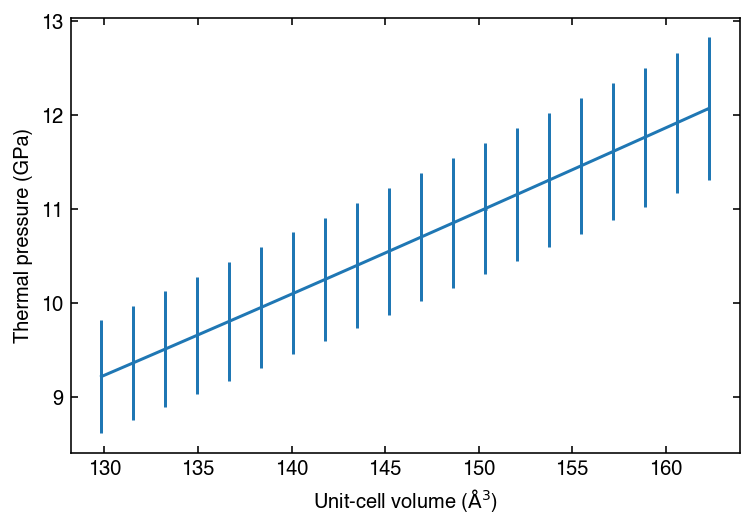

In [25]:
plt.errorbar(unp.nominal_values(v_u), unp.nominal_values(p_th),
            xerr=unp.std_devs(v_u), yerr=unp.std_devs(p_th))
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('Thermal pressure (GPa)');